# 1
飛行機の乗客数データ

<pre> 
144データ（1949年1月から1960年12月まで、月毎の飛行機乗客数)

【実習1】１の解析データ（飛行旅客機の乗客数）
【実習2】ARIMAとSARIMAを比較する
![image.png](attachment:image.png)
</pre>


In [7]:
%matplotlib inline
import numpy as np
np.random.seed(555)
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
from statsmodels.graphics import tsaplots
from statsmodels.tsa import stattools
from statsmodels.tsa.arima_model import ARIMA

In [9]:
import requests
import io

# 飛行機の乗客数データ(月ごと)
url = "https://www.analyticsvidhya.com/wp-content/uploads/2016/02/AirPassengers.csv"
stream = requests.get(url).content
content = pd.read_csv(io.StringIO(stream.decode('utf-8')))

<AxesSubplot:xlabel='Month'>

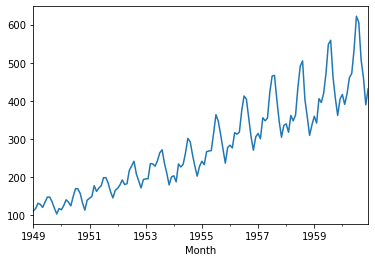

In [10]:
df_content = content.copy()
df_content['Month'] = pd.to_datetime(df_content['Month'], 
                                     infer_datetime_format=True)
y = pd.Series(df_content["#Passengers"].values, index=df_content['Month'])
y = y.astype('f')
y.plot()

In [12]:
df_content.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


<ipython-input-13-1dd76ebb3b64>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  res = sm.tsa.seasonal_decompose(y, freq=12)


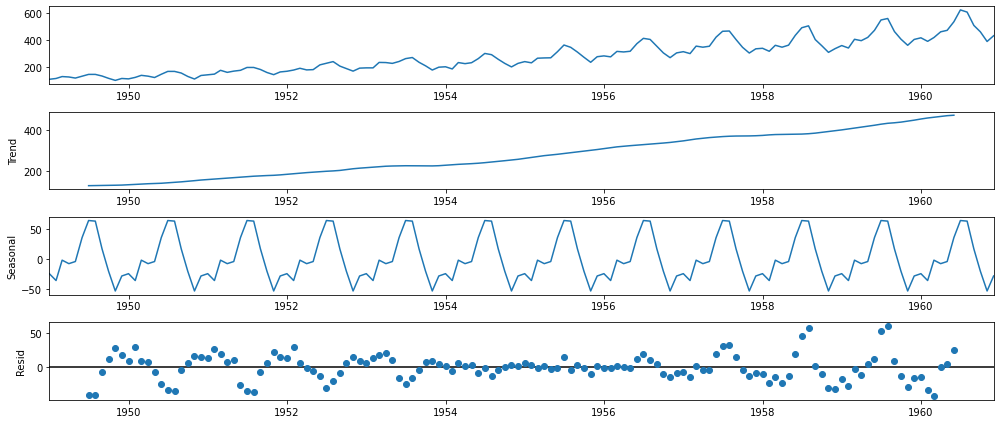

<Figure size 1200x400 with 0 Axes>

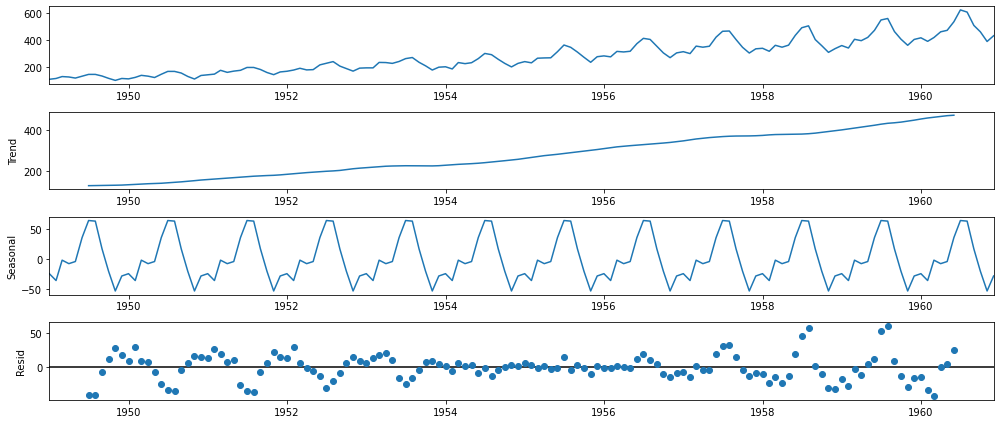

In [13]:
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(y, freq=12)

plt.rcParams["figure.figsize"] = (14, 6)
plt.figure(figsize=(24, 8), dpi=50)
res.plot()